In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


Aligned Face Dataset from Pinterest

In [0]:
import tensorflow
tensorflow.__version__

'2.1.0'

####Mount Google drive and Colab



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


####Change the Working Directory 

In [0]:
proj_path = "/content/drive/My Drive/Face-Recognition-CV/"

import os, sys 
os.chdir(proj_path)

# Add the path to the sys.path for this session
sys.path.append(proj_path)

####Extracting the ZIP File

In [0]:
pinterest_images = 'Aligned Face Dataset from Pinterest.zip'
import zipfile
archive = zipfile.ZipFile(pinterest_images, 'r')
# Changing the working directory makes sure it is extracted in project path
archive.extractall()

####Load the Images from Extracting Folder & Each Image with PersonId

In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

####Load a Image Using 'imshow'

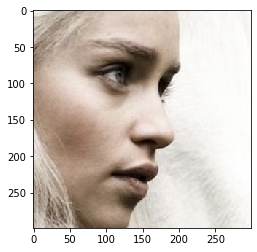

In [0]:
import matplotlib.pyplot as plt
plt.imshow(load_image(metadata[np.random.randint(0, 10710)].image_path()))

####Predefined Model For VGG Face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    # model.add(Activation('relu'))
    model.add(Activation('softmax'))
    return model

####Load the Given File 'vgg_face_weights.h5' File

In [0]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

####Importing the Model

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

####Load the Image Height & Width in Metadata from the Pre-Trained Model.

In [0]:
# Get embedding vector for first image in the metadata using the pre-trained model
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


####Metadata & Create Embeddings For Each Image Using vgg_face_descriptor. Then predict() and Store in a List

In [0]:
def generate_all_embeddings(metadata):
    # Create an embedding vector of all zeros, then fill it up with actual image embeddings iteratively.
    embeddings = np.zeros((metadata.shape[0], 2622))
    for idx, meta in enumerate(metadata):
       try:
           img = load_image(meta.image_path())
           # scale RGB values to interval [0,1]
           img = cv2.resize(img, dsize = (224,224))
           img = (img / 255.).astype(np.float32)
           # obtain embedding vector for image
           embeddings[idx] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
       except Exception as ex:
        print('Could not generate embedding s for', meta.image_path(), ' Exception--', str(ex))
    return embeddings

Import Pickle Used For Serializing & De-Serializing in an Object

In [0]:
import pickle
embedding_pkl = 'embeddings.pickle'

# Generate all embeddings and serialize it in the drive
if os.path.isfile(embedding_pkl) and os.path.getsize(embedding_pkl) > 0:
    embeddings = pickle.load(open(embedding_pkl,"rb"))
else:
    embeddings = generate_all_embeddings(metadata)
    with open(embedding_pkl, 'wb') as handle:
        pickle.dump(embeddings, handle, protocol=pickle.HIGHEST_PROTOCOL)
        

####Calculate the Distance Between Two Pairs of Images

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

Using Matplotlib to Get Distance Paris

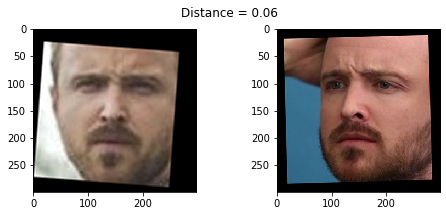

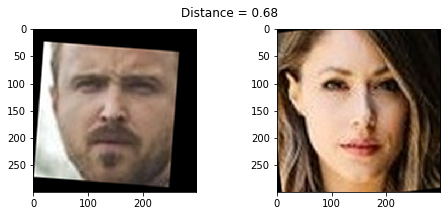

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(4, 6)
show_pair(4, 280)

####Create Test and Train with Id's of Feature Labels



In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

####Using Sklearn.Processing to Import LabelEncoder for Numeric Identify

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Numerical encoding of identities
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

####Reduce Feature Dimensions Using Principal Component Analysis


In [0]:
from sklearn.decomposition import PCA
# Create a co-variance matrix and calculate eigen values
covar_mat = PCA().fit(X_train)
# calculate variance ratios
var = covar_mat.explained_variance_ratio_;var

array([1.35886712e-01, 5.39823994e-02, 3.99019010e-02, ...,
       1.67724726e-09, 1.65445561e-09, 9.19327461e-11])

In [0]:
  # cumulative sum of variance explained with [n] features
eigen_vals = np.round(covar_mat.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([13.6, 19. , 23. , ..., 91.7, 91.7, 91.7])

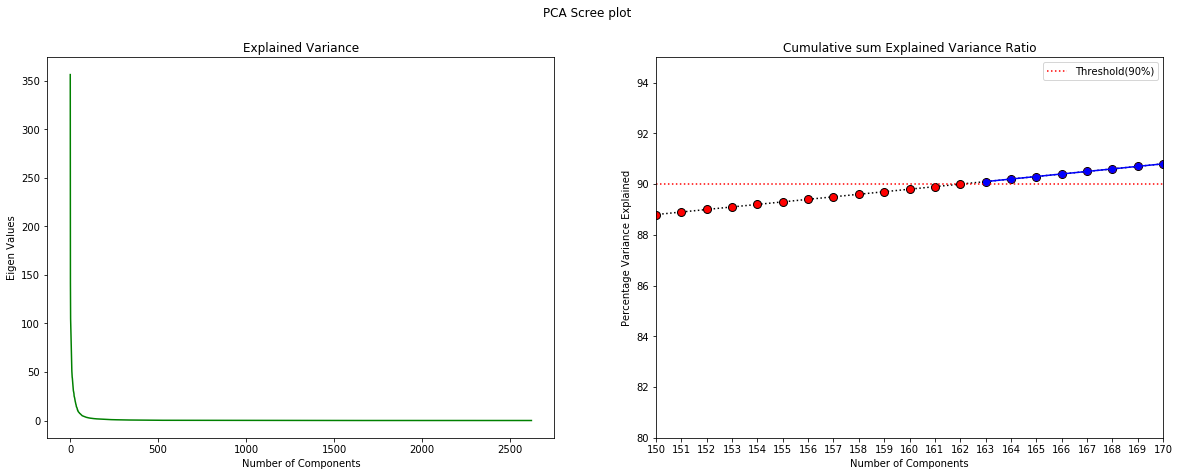

In [0]:
threshold=90
def generate_scree_plot(covar_matrix, threshold):
    var = covar_matrix.explained_variance_
    eigen_vals = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    f.suptitle('PCA Scree plot')
    ax1.plot(np.arange(1, len(var)+1), var, '-g')
    ax1.set_title('Explained Variance')
    ax1.set_xlabel('Number of Components')
    ax1.set_ylabel('Eigen Values')

    ax2.plot(np.arange(1, len(eigen_vals)+1), eigen_vals, ':k', marker='o', markerfacecolor='red', markersize=8)
    ax2.set_xticks(np.arange(1, len(eigen_vals)+1))
    ax2.axhline(y=threshold, color='r', linestyle=':', label='Threshold(90%)')
    ax2.legend()
    ax2.plot(np.arange(sum(eigen_vals <= threshold) + 1, len(eigen_vals) + 1), 
             [val for val in eigen_vals if val > threshold], '-bo')
    ax2.set_ylim(bottom=threshold-10, top=95)
    ax2.set_xlim([150,170])
    ax2.set_title('Cumulative sum Explained Variance Ratio')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Percentage Variance Explained')


generate_scree_plot(covar_mat, threshold=threshold)

#Consideration:
####     From Cumulative Variance Ratio Plot that there are 162 Components Explaining More than 90% of Variance.

In [0]:
pca = PCA(n_components=163, svd_solver='randomized', whiten=True)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

####Support Vector Machine to Fit the Classifier and Print the Score

In [0]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', class_weight=None , C=10000000, gamma='auto')
clf.fit(X_train, y_train)
print('Score of the classifier: %.2f%%' % (clf.score(X_test, y_test) * 100))

Score of the classifier: 96.41%


Image from Test Dataset & Plot the Image

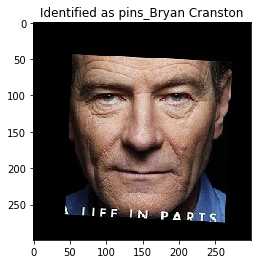

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf.predict([X_test[example_idx]])
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

#**OBSERVATIONS**:
####- Aligned Face Dataset from Pinterest
####- Mount Google drive and Colab
####- Change the Working Directory
####- Extracting the File
####- Load the Images from Extracting Folder & Each Image with PersonId
####- Load a Image Using 'imshow' 
####- Predefined Model For VGG Face
####- Load the Given File 'vgg_face_weights.h5' File
####- Importing the Model
####- Load the Image Height & Width in Metadata from the Pre-Trained Model.
####- Metadata & Create Embeddings For Each Image Using vgg_face_descriptor. Then predict() and Store in a List
####- Import Pickle Used For Serializing & De-Serializing in an Object
####- Calculate the Distance Between Two Pairs of Images
####- Create Test and Train with Id's of Feature Labels
####- Using Sklearn.Processing to Import LabelEncoder for Numeric Identify
####- Reduce Feature Dimensions Using Principal Component Analysis
####- Support Vector Machine to Fit the Classifier and Print the Score
####- Image from Test Dataset & Plot the Image

#**CONCLUSION**:

####*- Primary Goal: To identify Human Faces Out of All Biometric Systems Available, It is the least Fastest Technology.*



####*-  Probably Experienced Snapshot filters. The Filter Looks For a Presence of a Human Face & then Maps the Facial Landmarks (Eyes, Nose, Lips, Etc). In Most Cases, This Removes the Feeling of Being Under Surveillance of Privacy.*



####- *In this Score of the classifier: 96.41% , USing SVM For the Accuracy.* 